# Load Data

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# The URL of the Google Spreadsheet in htmlview
url = 'https://docs.google.com/spreadsheets/u/0/d/1u1_8ND_BY1DaGaQdu0ZRZPebrOaTJekE9hyw_7BAlzw/htmlview?pli=1#'

# Perform an HTTP GET request to fetch the webpage content
response = requests.get(url)
if response.status_code == 200:
    # Use BeautifulSoup to parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the table with class 'waffle'
    table = soup.find('table', class_='waffle')
    
    # Extract table data if the table is found
    if table:
        # Extract rows
        rows = table.find_all('tr')
        data = []
        for row in rows:
            cols = row.find_all(['th', 'td'])  # This handles both header and normal rows
            cols = [ele.text.strip() for ele in cols]
            data.append(cols)
        
        # Convert to DataFrame
        df = pd.DataFrame(data)
        
        # Optional: Specify the first row as header if applicable
        df.columns = df.iloc[0]
        df = df[1:]
        
        print(df)
    else:
        print("Table with class 'waffle' not found.")
else:
    print("Failed to retrieve webpage, status code:", response.status_code)


0                                    A  \
1        1        Carimbo de data/hora   
2                                        
3        2  CRIADO POR ANDERSON WEBER:   
4        3         25/03/2024 17:31:26   
5        4         25/03/2024 19:04:53   
...    ...                         ...   
2088  2087         27/03/2024 00:54:42   
2089  2088         27/03/2024 00:55:07   
2090  2089         27/03/2024 00:56:20   
2091  2090         27/03/2024 00:57:52   
2092  2091         27/03/2024 00:57:56   

0                                              B  \
1                                Nome da empresa   
2                                                  
3     https://www.linkedin.com/in/andersonweber/   
4                                    grupofreela   
5                                       /r/brdev   
...                                          ...   
2088                                   Long Road   
2089                                     Compart   
2090                       

In [14]:
df = df.rename(columns={"A": "Created", "B": "Company Name", "C": "Reason"})
df = df[3:]

In [17]:
# Count the frequency of each company
company_counts = df['Company Name'].value_counts()

# Convert to DataFrame for easier plotting
company_counts_df = company_counts.reset_index()
company_counts_df.columns = ['Company Name', 'Frequency']

# Display the most frequently mentioned companies
print(company_counts_df.head())


  Company Name  Frequency
0         CI&T         30
1    Accenture         29
2  Wise System         22
3    Stefanini         22
4          IBM         21


/tmp/ipykernel_28549/4021899711.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Frequency', y='Company Name', data=company_counts_df.head(N), palette='coolwarm')


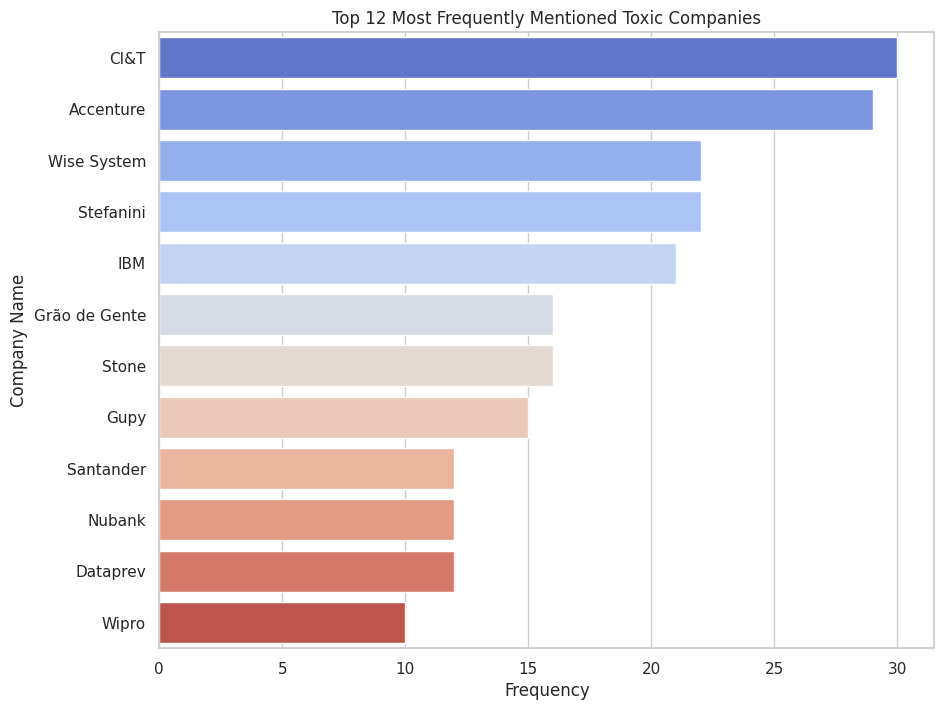

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Define the number of companies you want to display
N = 12

# Plotting
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Frequency', y='Company Name', data=company_counts_df.head(N), palette='coolwarm')
ax.set_title('Top {} Most Frequently Mentioned Toxic Companies'.format(N))
ax.set_xlabel('Frequency')
ax.set_ylabel('Company Name')

# Show the plot
plt.show()


In [26]:
# get a set from "Company Name" column to get unique values
companys = df['Company Name'].unique()

In [30]:
df.to_csv('toxic_companys_brasil.csv')